# Report

### Implementation

To solve Unity's 'BananaWorld' I have used a Deep Q Network with a replay buffer and a fixed target network as described in the original [paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf).
- The Deep Q Network consists in my implementation of three hidden layers of each 16 nodes, each with a relu activation.
- The replay buffer stores the most recent 10.000 experiences and retrieves 32 random experiences in every batch
- The fixed target network is updated with soft update of the network parameters. 

The exact configuration of the various hyperparameters can be found in the following configuration dictionary, which is also used in the implementation:

In [1]:
config = {'lr': 0.001, 'alpha': 0.01, 'update_freq': 4, 'gamma': 0.99,
          'tau': 0.001, 'max_nr_steps': 10000, 'algo': 'dqn',
         'nr_episodes': 800, 'eps_min': 0.01, 'eps_decl': 0.995, 
         'output_freq': 100}

### Results

The resulting agent is able to obtain a rolling average score of 13 over the past 100 episodes after apprx. 600 episodes, as can be seen in the following plot:

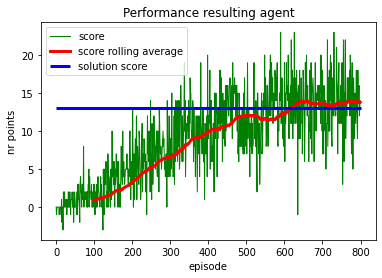

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
results = np.load('results.npy')
df = pd.DataFrame(results)
ax = df.plot(lw = 1, c = 'g')
df.rolling(100).mean().plot(ax=ax, lw=3, c='r')
ax.hlines(13, 0, len(df), 'b', lw=3, zorder=10)
ax.legend(["score", "score rolling average", "solution score"])
plt.xlabel('episode')
plt.ylabel('nr points')
plt.title('Performance resulting agent')
plt.show()

### Future work

- I have observed that the resulting agent sometimes get's stuck right in front of a blue banana. In stead of accepting the loss and moving forward to retrieve additional positive points, it spends the remainder of time preventing to have to move over the blue banana. This could potentially be solved by a better exploration/exploitation strategy.
- A double DQN implementation should result in a faster solution. I have attempted to implement the double dqn algorithm, but the results under the same configuration of the hyper parameters, shows deplorable results, likely indicating a wrong implementation. This still requires additional work.